In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Cars_data.csv")


print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Check for Missing Values

In [5]:
df.isnull().sum().sort_values(ascending=False).head(10)


Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
dtype: int64

Clean the Data

In [6]:
# Fill missing categorical and numeric values
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns

df[cat_cols] = df[cat_cols].fillna('Unknown')
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Create new column 'Age' of cars
df['Age'] = 2025 - df['Year']

# Show first 3 rows
df.head(3)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Age
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,14
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,14
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,14


Scatter Plot — MSRP vs Engine HP

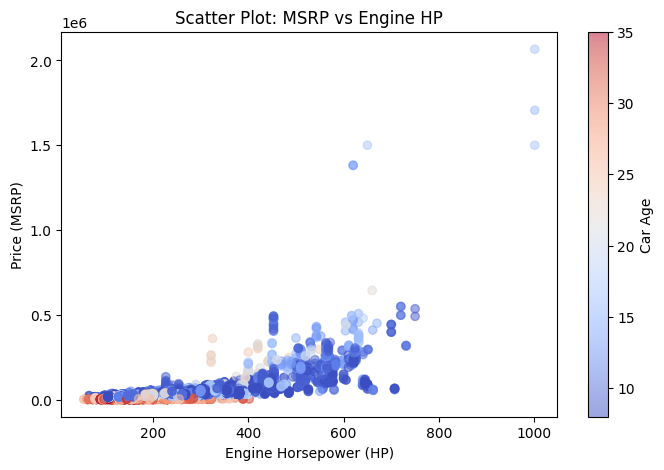

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df['Engine HP'], df['MSRP'], alpha=0.5, c=df['Age'], cmap='coolwarm')
plt.colorbar(label='Car Age')
plt.xlabel("Engine Horsepower (HP)")
plt.ylabel("Price (MSRP)")
plt.title("Scatter Plot: MSRP vs Engine HP")
plt.show()


Line Plot — Median Car Price by Year

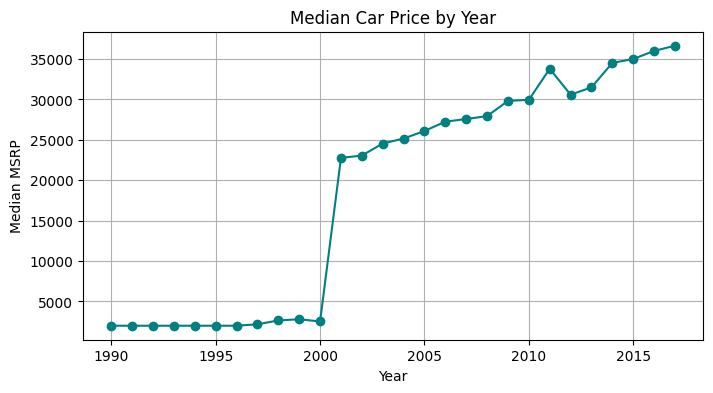

In [8]:
median_price = df.groupby('Year')['MSRP'].median()

plt.figure(figsize=(8,4))
plt.plot(median_price.index, median_price.values, marker='o', color='teal')
plt.title("Median Car Price by Year")
plt.xlabel("Year")
plt.ylabel("Median MSRP")
plt.grid(True)
plt.show()


Bar Chart — Top 10 Car Brands

C:\Users\Arshit\AppData\Local\Temp\ipykernel_8164\2223599905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='viridis')


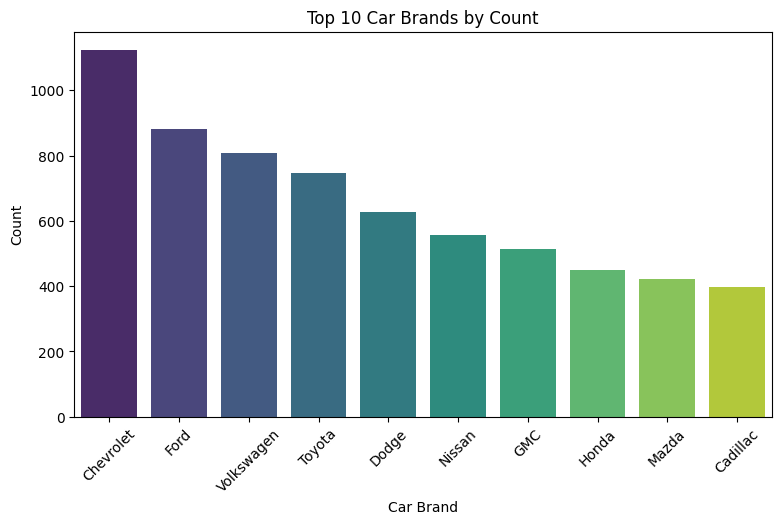

In [9]:
top10 = df['Make'].value_counts().head(10)

plt.figure(figsize=(9,5))
sns.barplot(x=top10.index, y=top10.values, palette='viridis')
plt.title("Top 10 Car Brands by Count")
plt.xlabel("Car Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Pie Chart — Fuel Type Distribution

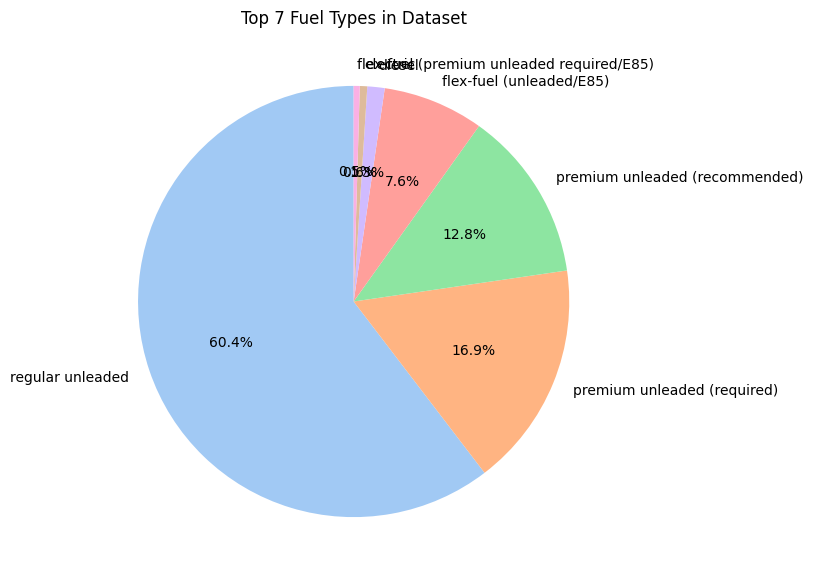

In [12]:
# Top 7 fuel types
top7_fuel = df['Engine Fuel Type'].value_counts().head(7)

plt.figure(figsize=(7,7))
plt.pie(
    top7_fuel, 
    labels=top7_fuel.index, 
    autopct="%1.1f%%", 
    startangle=90,
    colors=sns.color_palette("pastel", 7)
)
plt.title("Top 7 Fuel Types in Dataset")
plt.show()
